In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential,Model 
from keras.layers.core import Dense,Dropout,Activation,Flatten,Reshape
from keras.layers import Embedding,Input ,merge, ELU
from keras.layers.recurrent import SimpleRNN , LSTM 
from keras.layers.convolutional import Convolution2D , MaxPooling2D
from keras.optimizers import SGD ,Adam,RMSprop
from keras.regularizers import l2,l1
from keras.utils.np_utils import to_categorical 
from keras import backend as K
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
from keras.layers.convolutional import MaxPooling2D 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from keras.layers import GlobalMaxPooling2D
import tensorflow.keras
import math
import numpy as np

In [3]:
import glob #grab some files 
from tqdm import tqdm # to look at progress bars
import scipy # Used for image processing 
import scipy.misc
import pandas as pd
import h5py as hp


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
camfiles=sorted(glob.glob('/content/drive/My Drive/Project_data/cam/*.h5'))
camfiles

['/content/drive/My Drive/Project_data/cam/2016-01-30--11-24-51.h5',
 '/content/drive/My Drive/Project_data/cam/2016-01-30--13-46-00.h5',
 '/content/drive/My Drive/Project_data/cam/2016-01-31--19-19-25.h5',
 '/content/drive/My Drive/Project_data/cam/2016-02-02--10-16-58.h5',
 '/content/drive/My Drive/Project_data/cam/2016-02-08--14-56-28.h5',
 '/content/drive/My Drive/Project_data/cam/2016-02-11--21-32-47.h5',
 '/content/drive/My Drive/Project_data/cam/2016-03-29--10-50-20.h5',
 '/content/drive/My Drive/Project_data/cam/2016-04-21--14-48-08.h5',
 '/content/drive/My Drive/Project_data/cam/2016-05-12--22-20-00.h5',
 '/content/drive/My Drive/Project_data/cam/2016-06-02--21-39-29.h5',
 '/content/drive/My Drive/Project_data/cam/2016-06-08--11-46-01.h5']

In [6]:
logfiles=sorted(glob.glob('/content/drive/My Drive/Project_data/log/*.h5'))
logfiles

['/content/drive/My Drive/Project_data/log/2016-01-30--11-24-51.h5',
 '/content/drive/My Drive/Project_data/log/2016-01-30--13-46-00.h5',
 '/content/drive/My Drive/Project_data/log/2016-01-31--19-19-25.h5',
 '/content/drive/My Drive/Project_data/log/2016-02-02--10-16-58.h5',
 '/content/drive/My Drive/Project_data/log/2016-02-08--14-56-28.h5',
 '/content/drive/My Drive/Project_data/log/2016-02-11--21-32-47.h5',
 '/content/drive/My Drive/Project_data/log/2016-03-29--10-50-20.h5',
 '/content/drive/My Drive/Project_data/log/2016-04-21--14-48-08.h5',
 '/content/drive/My Drive/Project_data/log/2016-05-12--22-20-00.h5',
 '/content/drive/My Drive/Project_data/log/2016-06-02--21-39-29.h5',
 '/content/drive/My Drive/Project_data/log/2016-06-08--11-46-01.h5']

In [7]:
data_1=np.load('/content/drive/My Drive/Project_data/data_set.npz')
X_train_imgs=data_1['img_train']

X_test_imgs=data_1['img_test']
spds_t=data_1['spds']
accel_t=data_1['accel']
speedx=np.concatenate((data_1['spds'],data_1['accel']))
speedx=speedx.reshape((-1,2))
steer_t=data_1['steer']
gas_t=data_1['gas']
brake_t=data_1['brake']
print(brake_t.shape)
print("brake= ",brake_t)
#y1=np.concatenate(speedx,steer_t)
#y_t=y_t.reshape((2,-1))
y1=np.concatenate((data_1['steer'],data_1['gas']))   #,data_1['brake'])
y1=y1.reshape(-1,2)
y2=np.concatenate((speedx,y1))
y2=y2.reshape(-1,4)
y_t=np.column_stack((y2,brake_t))
y_t=y_t.reshape((-1,5))
#print(steer_t)
#print(speedx[10:20])
#print(" \n X_t",X_t)
print("y_t shape: ",y_t.shape)
y_t=np.array(y_t)
print("\n y_t",y_t[2300:2307]) # Checking 7 examples
print("\n X_train_imgs shape :",X_train_imgs.shape)
#np.reshape(X_t,X_t.shape[0],X_t.shape[2],X_t.shape[3],X_t.shape[1])
#print("\n X_t shape is now changed as per tf style :",X_t.shape)

#print("\n ",brake_t)  /content/data_set.npz


(51691,)
brake=  [1.         1.         1.         ... 0.0290702  0.02920806 0.02902903]
y_t shape:  (51691, 5)

 y_t [[0.68242173 0.68204375 0.68211344 0.68149425 0.001001  ]
 [0.68125064 0.68280209 0.68208154 0.6848974  0.001001  ]
 [0.68237525 0.6837076  0.68452569 0.68297932 0.001001  ]
 [0.68418113 0.6832365  0.68513305 0.6826029  0.00103667]
 [0.68347704 0.68440163 0.68403412 0.68587776 0.0015015 ]
 [0.68491292 0.68708708 0.684613   0.68554028 0.0015015 ]
 [0.68741198 0.6856661  0.68786057 0.68774052 0.0015015 ]]

 X_train_imgs shape : (46521, 3, 80, 80)


In [8]:
spds_train=spds_t[0:X_train_imgs.shape[0]]
spds_test=spds_t[X_train_imgs.shape[0]+1:-1]
steer_train=steer_t[0:X_train_imgs.shape[0]]

steer_test=steer_t[X_train_imgs.shape[0]+1:-1]

accel_train=accel_t[0:X_train_imgs.shape[0]]
accel_test=accel_t[X_train_imgs.shape[0]+1:-1]
gas_train=gas_t[0:X_train_imgs.shape[0]]
gas_test=gas_t[X_train_imgs.shape[0]+1:-1]
brake_train=brake_t[0:X_train_imgs.shape[0]]
brake_test=brake_t[X_train_imgs.shape[0]+1:-1]

In [9]:
import keras.backend.tensorflow_backend as tfback
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

In [79]:
def make_model(X,Y):
    model=Sequential()
              #model.add(Dense(10,activation='relu')) #input layer
    model.add(Convolution2D(128,(3,3),input_shape=(3,80,80),activation='relu',data_format='channels_first')) #1st conv layer
    model.add(MaxPooling2D())       #pool_size=(2,2),data_format='channels_last'
    #x=modl(inputs)                  #add model layers
                      #model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
    model.add(Convolution2D(256,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D())
    #model.add(Dropout(0.5))
    #x=modl(inputs)           #pool_size=(2,2),data_format='channels_first
    model.add(Convolution2D(256,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))
    #x=modl(inputs)     #pool_size=(2,2),data_format='channels_first'
    model.add(Convolution2D(64,(3,3),activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
    model.add(Convolution2D(64,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D()) 
    #model.add(Dropout(0.2))
    #x=modl(inputs)        #
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    #x=modl(inputs)
    model.add(Dense(64, activation='relu'))
    #x=modl(inputs)
    model.add(Dense(1,activation='linear'))
    #model= Model(inputs=inputs,outputs=outputs)
    print(model.summary())
    model.compile(loss='mae',optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(X,Y, batch_size=500, epochs=50, validation_split=0.15)
    return history

In [ ]:
history=make_model(X_train_imgs,spds_train)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 128, 78, 78)       3584      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 64, 39, 78)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 256, 37, 76)       147712    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 128, 18, 76)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 256, 16, 74)       295168    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 128, 8, 74)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128, 8, 74)      

In [38]:
from tensorflow.keras.models import load_model
# save entire model to HDF5 
history.model.save("spds_model.h5py")
!cp "/content/spds_model.h5py"  "/content/drive/My Drive/Project_data/spds_model.h5py"

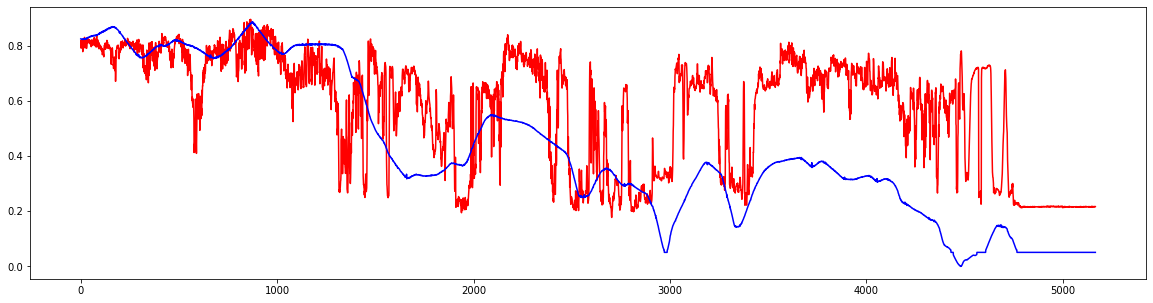

In [75]:
import matplotlib.pyplot as plt
pred=history.model.predict(X_test_imgs)

plt.rcParams["figure.figsize"] = (20,5)

plt.plot(pred,color='red')
plt.plot(spds_test,color='blue')

In [76]:
m=tf.keras.losses.mean_absolute_error(spds_test,pred)
print("mean absolute error is ",m)
mae=0
mae=np.sum(m,axis=0)
avg=mae/spds_test.shape
print("The average mean abosulte error is ",avg)

mean absolute error is  tf.Tensor([0.39641416 0.37686193 0.37603834 ... 0.2648845  0.2652509  0.26502135], shape=(5168,), dtype=float32)
The average mean abosulte error is  [0.30523727]


The above graph shows the performance of the model to predict steering angle on unseen data.

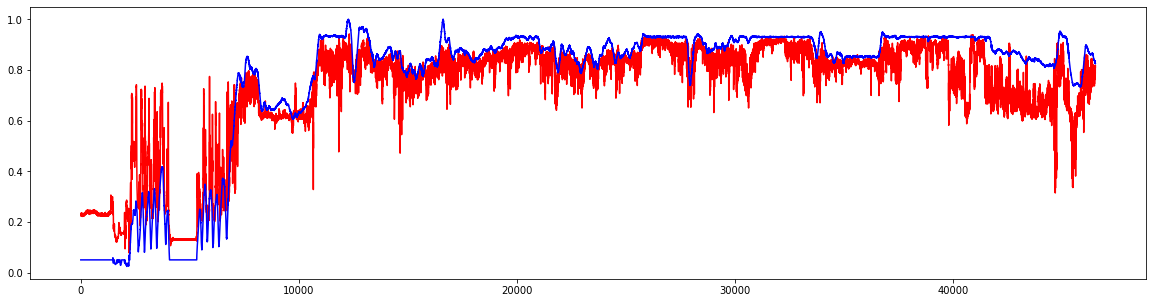

In [77]:
spds_cap=history.model.predict(X_train_imgs)

plt.plot(spds_cap,color='red')
plt.plot(spds_train,color='blue')

The above graph shows difference between labelled and calculated data .


In [ ]:
accel_model = make_model(X_train_imgs, accel_train)   # acceleration prediction 
accel_model.model.save("accel_model.h5py")
!cp "/content/accel_model"  "/content/drive/My Drive/Project_data/accel_model.model"

Epoch 1/30
373/373 [==============================] - 99s 265ms/step - loss: 0.0869 - mean_absolute_error: 0.2297 - val_loss: 0.0245 - val_mean_absolute_error: 0.1472
Epoch 2/30
373/373 [==============================] - 99s 265ms/step - loss: 0.0869 - mean_absolute_error: 0.2295 - val_loss: 0.0279 - val_mean_absolute_error: 0.1581
Epoch 3/30
373/373 [==============================] - 98s 264ms/step - loss: 0.0869 - mean_absolute_error: 0.2300 - val_loss: 0.0244 - val_mean_absolute_error: 0.1466
Epoch 4/30
373/373 [==============================] - 98s 264ms/step - loss: 0.0869 - mean_absolute_error: 0.2297 - val_loss: 0.0237 - val_mean_absolute_error: 0.1444
Epoch 5/30
373/373 [==============================] - 99s 264ms/step - loss: 0.0870 - mean_absolute_error: 0.2302 - val_loss: 0.0248 - val_mean_absolute_error: 0.1479
Epoch 6/30
373/373 [==============================] - 99s 265ms/step - loss: 0.0869 - mean_absolute_error: 0.2299 - val_loss: 0.0189 - val_mean_absolute_error: 0.128

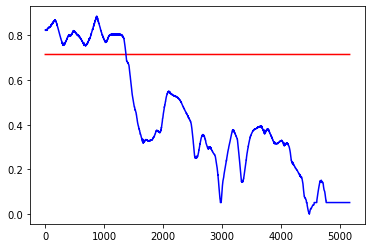

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:500% !important; }</style>"))

pred=new_model.predict(X_test_imgs)
plt.plot(pred,color='red',label='spds')
plt.plot(spds_test,color='blue')